<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'sales_vs_discount.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 'sales.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail.xlsx',
 'bz_data_analyis.csv',
 'sample_data']

In [18]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.columns = [re.sub(' ', '_', a.lower()) for a  in df.columns]
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
df['date_diff'] = [df['effective_to_date'].max() + pd.offsets.MonthEnd(0) - a for a in df['effective_to_date']]
df['date_diff'] = df['date_diff'].dt.days
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,date_diff
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,4
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,28
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,39
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,25


In [23]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [33]:
col_nor = ['state','response', 'coverage','education','employmentstatus', 'gender','location_code', 'marital_status',
           'policy_type','renew_offer_type','sales_channel', 'vehicle_class', 'vehicle_size']
col_num = ['income','months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints','number_of_policies',
           'total_claim_amount', 'date_diff']
col_target = ['customer_lifetime_value']

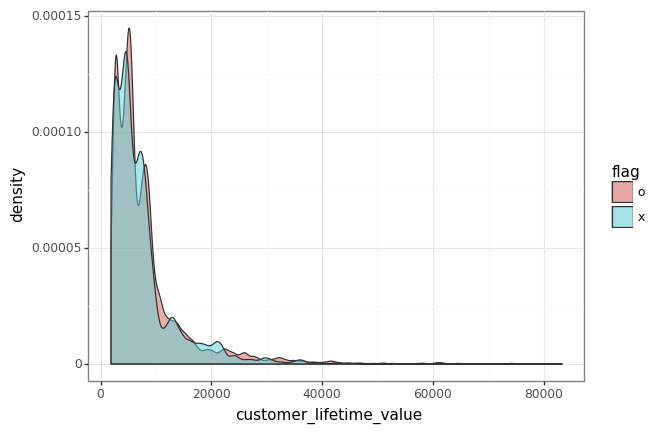

<ggplot: (8764331871275)>

In [22]:
(
    ggplot(
        df.assign(flag = ['x' if a == 0 else 'o' for a in df['income']]),
        aes('customer_lifetime_value', fill = 'flag') 
    ) +
    gg.geom_density(color = '#333333', alpha = .5) +
    gg.theme_bw()
)

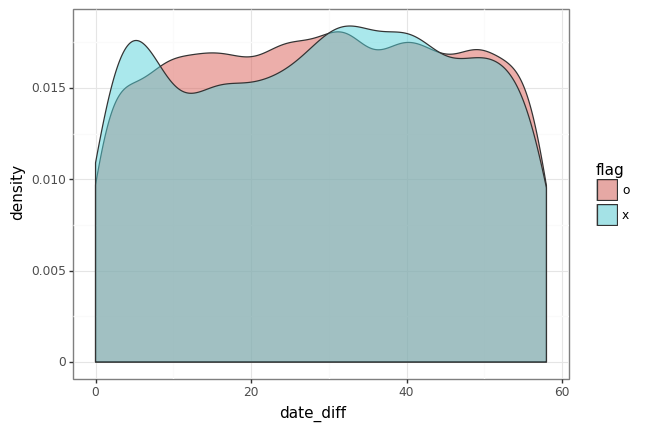

<ggplot: (8764328626180)>

In [38]:
(
    ggplot(
        df.assign(flag = ['x' if a == 0 else 'o' for a in df['income']]),
        aes('date_diff', fill = 'flag') 
    ) +
    gg.geom_density(color = '#333333', alpha = .5) +
    gg.theme_bw()
)

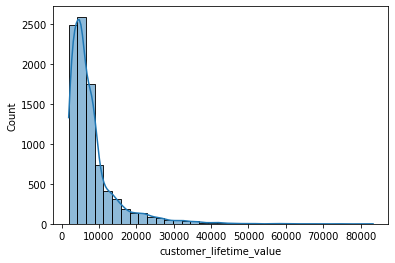

In [39]:
sns.histplot(data = df, x = 'customer_lifetime_value', bins = 35, kde = True)

In [45]:
df = df.assign(grade = pd.qcut(df['customer_lifetime_value'], 5, list('EDCBA')))
df[['customer_lifetime_value', 'grade']].head()

,customer_lifetime_value,grade
0,2763.519279,E
1,6979.535903,C
2,12887.431650,A
3,7645.861827,B
4,2813.692575,E


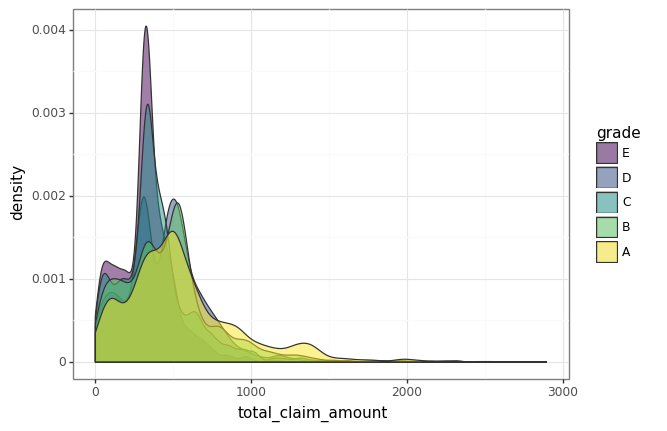

<ggplot: (8764329223762)>

In [47]:
(
    ggplot(
        df.assign(flag = ['x' if a == 0 else 'o' for a in df['income']]),
        aes('total_claim_amount', fill = 'grade') 
    ) +
    gg.geom_density(color = '#333333', alpha = .5) +
    gg.theme_bw()
)

<Figure size 864x864 with 0 Axes>

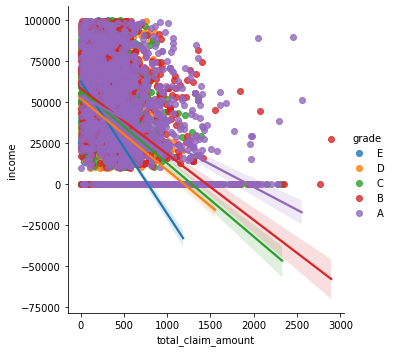

In [54]:
plt.figure(figsize = [12,12])
sns.lmplot(data = df, x = 'total_claim_amount', y = 'income', hue = 'grade')

<Figure size 864x864 with 0 Axes>

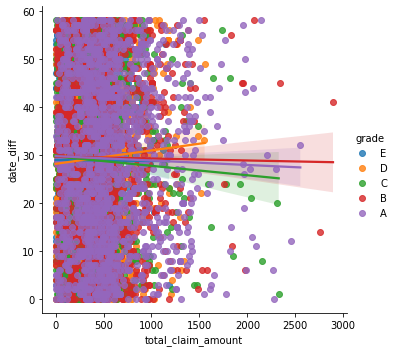

In [55]:
plt.figure(figsize = [12,12])
sns.lmplot(data = df, x = 'total_claim_amount', y = 'date_diff', hue = 'grade')

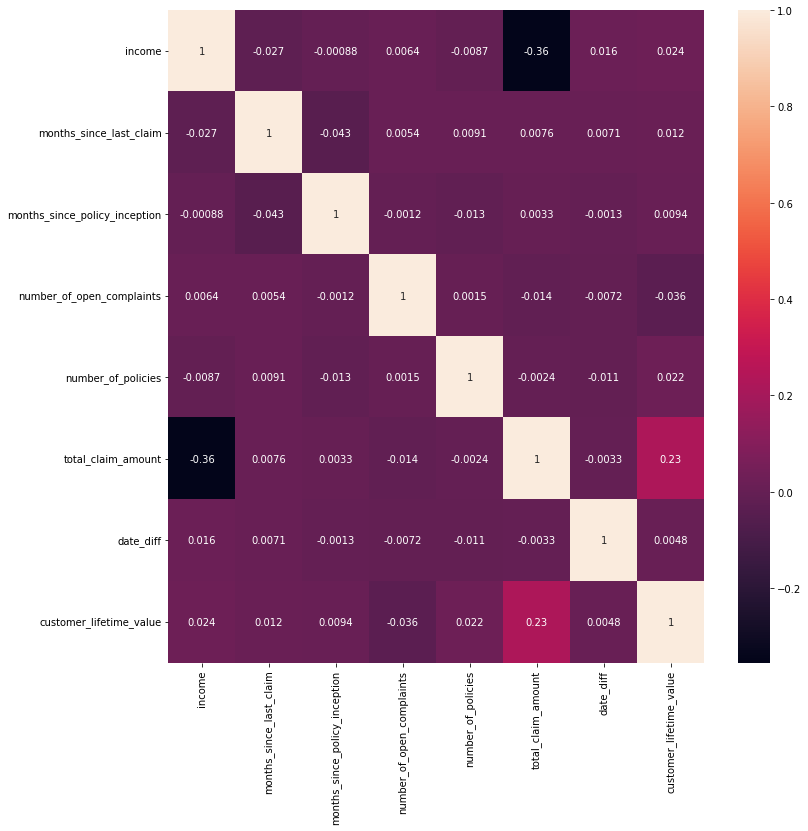

In [37]:
plt.figure(figsize = [12, 12])
sns.heatmap(df[col_num + col_target].corr(), annot = True)

# Iterators

In [56]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [57]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}